In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data=pd.read_csv('/content/IOC.csv')

In [266]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [267]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [268]:
data['Date']=pd.to_datetime(data['Date'])

In [269]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


In [270]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [271]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [272]:
df=data.loc[:,'Prev Close':]

In [273]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN,9.300000,6.633858
1,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN,5.470287,-2.381392
2,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN,3.112840,-1.172466
3,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN,2.714314,-0.459242
4,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN,5.429418,1.672434


In [274]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [275]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,IOC,EQ,360.30,358.35,359.9,348.35,352.2,351.85,352.17,843003,2.968765e+13,16416.0,256452.0,0.3042,3.315631,-2.345268
3720,2014-12-03,IOC,EQ,351.85,353.00,353.2,344.55,345.0,345.35,347.84,1066167,3.708583e+13,25755.0,570048.0,0.5347,2.510521,-1.847378
3721,2014-12-04,IOC,EQ,345.35,346.00,350.2,345.35,347.4,347.00,347.67,667340,2.320165e+13,11247.0,157434.0,0.2359,1.404372,0.477776
3722,2014-12-05,IOC,EQ,347.00,348.05,349.8,343.55,345.5,345.40,346.29,483701,1.675000e+13,7831.0,172511.0,0.3566,1.819240,-0.461095
3723,2014-12-08,IOC,EQ,345.40,345.95,351.9,342.10,344.0,343.90,346.38,1067804,3.698646e+13,12219.0,610097.0,0.5714,2.864659,-0.434279


In [276]:
df=new_df.loc[:,'Prev Close':]

In [277]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.997773,0.997410,0.997439,0.997150,0.997166,0.997406,-0.566762,-0.175786,-0.354518,-0.381650,0.548335,-0.114551,-0.015377
Open,0.997773,1.000000,0.999630,0.999651,0.999332,0.999352,0.999613,-0.568191,-0.177004,-0.355231,-0.383928,0.547653,-0.115258,0.030431
High,0.997410,0.999630,1.000000,0.999569,0.999705,0.999729,0.999861,-0.564832,-0.170928,-0.349711,-0.381218,0.543713,-0.103266,0.042090
Low,0.997439,0.999651,0.999569,1.000000,0.999725,0.999738,0.999853,-0.569324,-0.178984,-0.358648,-0.384833,0.549311,-0.127760,0.042435
Last,0.997150,0.999332,0.999705,0.999725,1.000000,0.999983,0.999884,-0.566485,-0.174061,-0.353669,-0.382407,0.546205,-0.116130,0.051023
Close,0.997166,0.999352,0.999729,0.999738,0.999983,1.000000,0.999907,-0.566586,-0.173976,-0.353582,-0.382565,0.546143,-0.115477,0.050845
VWAP,0.997406,0.999613,0.999861,0.999853,0.999884,0.999907,1.000000,-0.566674,-0.174520,-0.353920,-0.382817,0.545715,-0.114849,0.045220
Volume,-0.566762,-0.568191,-0.564832,-0.569324,-0.566485,-0.566586,-0.566674,1.000000,0.787925,0.731943,0.888950,-0.280891,0.320884,0.026133
Turnover,-0.175786,-0.177004,-0.170928,-0.178984,-0.174061,-0.173976,-0.174520,0.787925,1.000000,0.795857,0.837907,0.034865,0.330834,0.048403
Trades,-0.354518,-0.355231,-0.349711,-0.358648,-0.353669,-0.353582,-0.353920,0.731943,0.795857,1.000000,0.663411,-0.072816,0.456247,0.004714


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.45) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.32).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.33).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.19) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.048) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(-0.00474) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.026) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.0008)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [278]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [279]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [280]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [281]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,IOC,EQ,254.00,260.00,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,9.300000,6.633858
1,2000-01-04,IOC,EQ,270.85,260.00,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,5.470287,-2.381392
2,2000-01-05,IOC,EQ,264.40,264.90,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,3.112840,-1.172466
3,2000-01-06,IOC,EQ,261.30,258.00,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,2.714314,-0.459242
4,2000-01-07,IOC,EQ,260.10,259.90,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,5.429418,1.672434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,IOC,EQ,88.05,88.70,88.80,87.75,88.20,88.20,88.28,7066681,6.238778e+13,31742.000000,2.065036e+06,0.292200,1.196581,0.170358
5302,2021-04-27,IOC,EQ,88.20,88.20,89.10,88.20,88.90,88.85,88.76,8752415,7.768566e+13,36649.000000,3.038898e+06,0.347200,1.020408,0.736961
5303,2021-04-28,IOC,EQ,88.85,89.20,89.55,89.00,89.30,89.40,89.29,6336704,5.657990e+13,28905.000000,2.147333e+06,0.338900,0.617978,0.619021
5304,2021-04-29,IOC,EQ,89.40,90.25,90.50,88.70,88.75,88.90,89.53,8957163,8.019050e+13,39431.000000,3.013420e+06,0.336400,2.029312,-0.559284


In [282]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [283]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


  Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0    IOC         0.020201                   0.501885             3.579033   

    Mean Volume  Mean Deliverable (%)  Mean VWAP  Overall Score  
0  3.188201e+06              0.489827  319.10503     469.783323  


In [284]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,9.300000,6.633858
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,5.470287,-2.381392
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,3.112840,-1.172466
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,2.714314,-0.459242
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,5.429418,1.672434


In [285]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,IOC,EQ,254.00,260.00,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,40210.116042,1.454141e+06,0.489827,9.300000,6.633858
1,2000-01-04,IOC,EQ,270.85,260.00,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,40210.116042,1.454141e+06,0.489827,5.470287,-2.381392
2,2000-01-05,IOC,EQ,264.40,264.90,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,40210.116042,1.454141e+06,0.489827,3.112840,-1.172466
3,2000-01-06,IOC,EQ,261.30,258.00,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,40210.116042,1.454141e+06,0.489827,2.714314,-0.459242
4,2000-01-07,IOC,EQ,260.10,259.90,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,40210.116042,1.454141e+06,0.489827,5.429418,1.672434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,IOC,EQ,88.05,88.70,88.80,87.75,88.20,88.20,88.28,7066681,6.238778e+13,31742.000000,2.065036e+06,0.292200,1.196581,0.170358
5302,2021-04-27,IOC,EQ,88.20,88.20,89.10,88.20,88.90,88.85,88.76,8752415,7.768566e+13,36649.000000,3.038898e+06,0.347200,1.020408,0.736961
5303,2021-04-28,IOC,EQ,88.85,89.20,89.55,89.00,89.30,89.40,89.29,6336704,5.657990e+13,28905.000000,2.147333e+06,0.338900,0.617978,0.619021
5304,2021-04-29,IOC,EQ,89.40,90.25,90.50,88.70,88.75,88.90,89.53,8957163,8.019050e+13,39431.000000,3.013420e+06,0.336400,2.029312,-0.559284


 Feature engineer and build machine learning solutions for the business
 Requirements

In [286]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [287]:
data['Volume_Change'] = data['Volume'].pct_change()


In [288]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [289]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [290]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,...,40210.116042,1.454141e+06,0.489827,9.300000,6.633858,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,...,40210.116042,1.454141e+06,0.489827,5.470287,-2.381392,-0.023814,0.029536,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,...,40210.116042,1.454141e+06,0.489827,3.112840,-1.172466,-0.035259,-0.225410,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,...,40210.116042,1.454141e+06,0.489827,2.714314,-0.459242,-0.039690,-0.039683,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,...,40210.116042,1.454141e+06,0.489827,5.429418,1.672434,-0.023629,-0.027548,NaN,NaN,NaN


In [291]:
data['Target_Close'] = data['Close'].shift(-1)


In [292]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,...,1.454141e+06,0.489827,9.300000,6.633858,0.000000,NaN,NaN,NaN,NaN,264.40
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,...,1.454141e+06,0.489827,5.470287,-2.381392,-0.023814,0.029536,NaN,NaN,NaN,261.30
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,...,1.454141e+06,0.489827,3.112840,-1.172466,-0.035259,-0.225410,NaN,NaN,NaN,260.10
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,...,1.454141e+06,0.489827,2.714314,-0.459242,-0.039690,-0.039683,NaN,NaN,NaN,264.45
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,...,1.454141e+06,0.489827,5.429418,1.672434,-0.023629,-0.027548,NaN,NaN,NaN,251.35


Mean Squared Error: 183.36807772798446
R2 Score: 0.9904029602794285


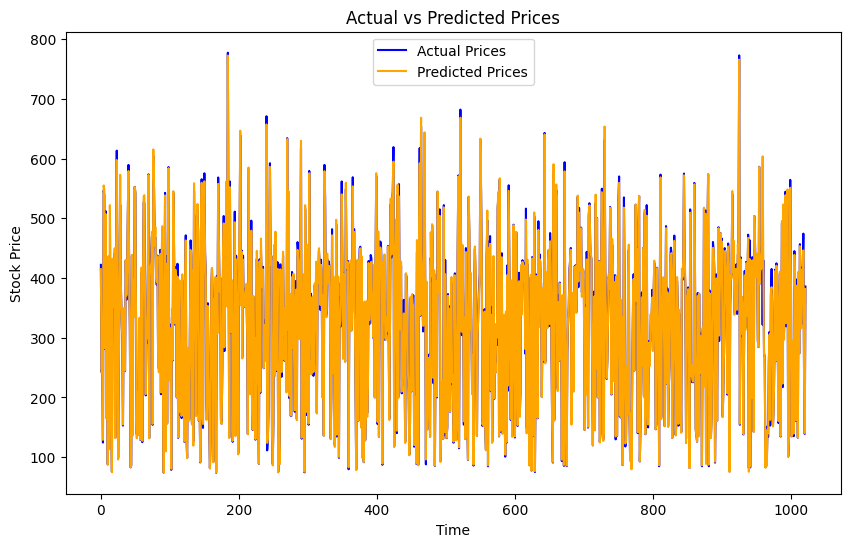

In [293]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [294]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,IOC,EQ,119.65,119.00,121.0,118.10,120.95,120.85,119.50,...,2.455546,1.002925,-0.553812,0.338235,135.663,172.82950,4.684810,120.60,0.010029,126.2675
200,2000-10-20,IOC,EQ,120.85,122.00,122.0,119.50,121.40,120.60,120.53,...,2.092050,-0.206868,-0.554735,-0.635588,135.343,172.07825,4.443898,117.10,-0.002069,125.5825
201,2000-10-23,IOC,EQ,120.60,117.00,120.0,116.30,117.05,117.10,118.16,...,3.181427,-2.902156,-0.567657,-0.021036,134.898,171.34175,4.697896,116.30,-0.029022,124.9375
202,2000-10-24,IOC,EQ,117.10,116.05,118.5,115.25,118.00,116.30,117.16,...,2.819957,-0.683177,-0.570611,0.076909,134.379,170.61675,4.850716,120.55,-0.006832,124.2050
203,2000-10-25,IOC,EQ,116.30,117.00,121.0,117.00,120.70,120.55,119.79,...,3.418803,3.654342,-0.554920,-0.223063,133.951,169.91900,4.829958,122.05,0.036543,123.8325


In [295]:
features=['Date','Close']

In [296]:
my_data=data[features]

In [297]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-297-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [298]:
my_data

,Date,Close
199,2000-10-19,120.85
200,2000-10-20,120.60
201,2000-10-23,117.10
202,2000-10-24,116.30
203,2000-10-25,120.55
...,...,...
5300,2021-04-23,88.05
5301,2021-04-26,88.20
5302,2021-04-27,88.85
5303,2021-04-28,89.40


In [299]:
my_data.index=my_data['Date']

In [300]:
del my_data['Date']

<Axes: xlabel='Date'>

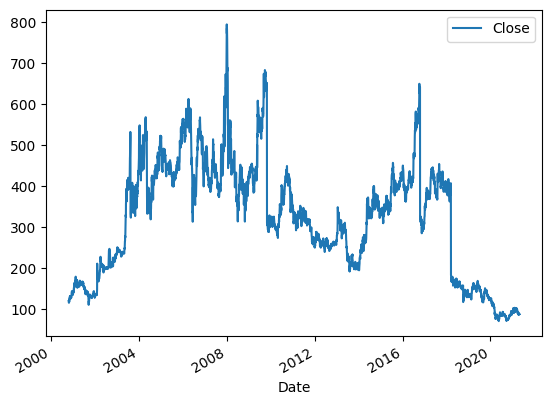

In [301]:
my_data.plot()

In [302]:
std_log=my_data.rolling(window=4).std()

In [303]:
mean_log=my_data.rolling(window=4).mean()

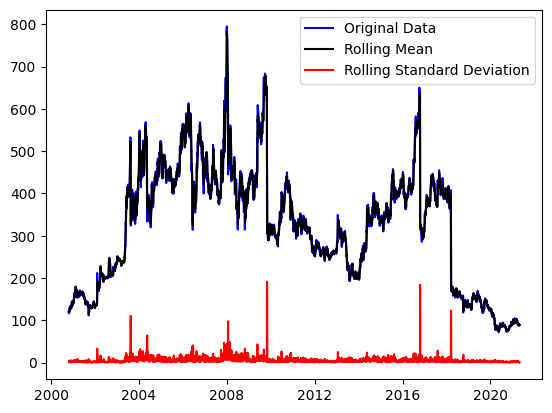

In [304]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [305]:
from statsmodels.tsa.stattools  import adfuller

In [306]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [307]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-3.089785677235441
p_value:0.02731838683906886
num_lags:1
num_observations:5104
critical_values:{'1%': -3.4316318557684675, '5%': -2.8621064441775963, '10%': -2.5670715184860238}
AIC:38942.802374617044


In [308]:
import numpy as np

In [309]:
first_log=np.log(my_data)

In [310]:
first_log.dropna()

,Close
Date,
2000-10-19,4.794550
2000-10-20,4.792479
2000-10-23,4.763028
2000-10-24,4.756173
2000-10-25,4.792065
...,...
2021-04-23,4.477905
2021-04-26,4.479607
2021-04-27,4.486950


<Axes: xlabel='Date'>

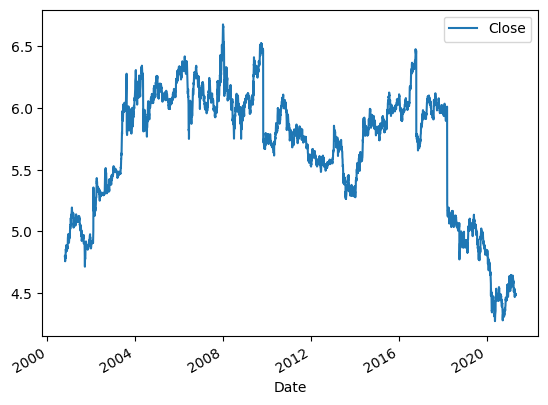

In [311]:
first_log.plot()

In [312]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

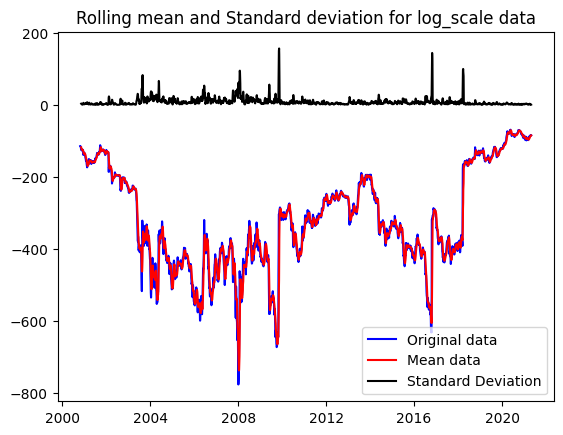

In [313]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [314]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-113.956327
2000-10-25,-113.845435
...,...
2021-04-23,-83.472095
2021-04-26,-83.495393
2021-04-27,-83.750550


In [315]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

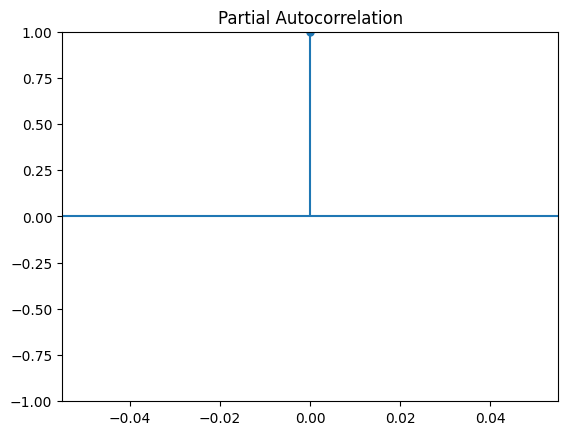

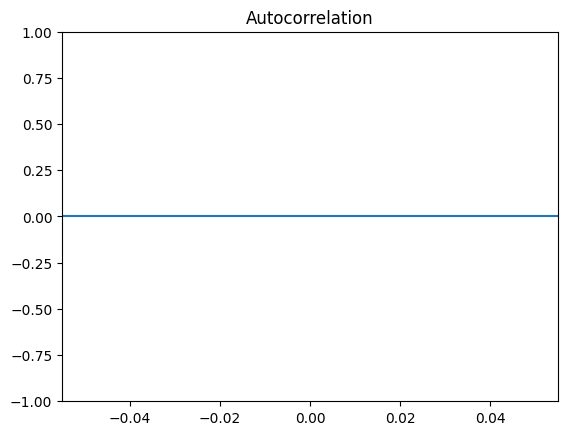

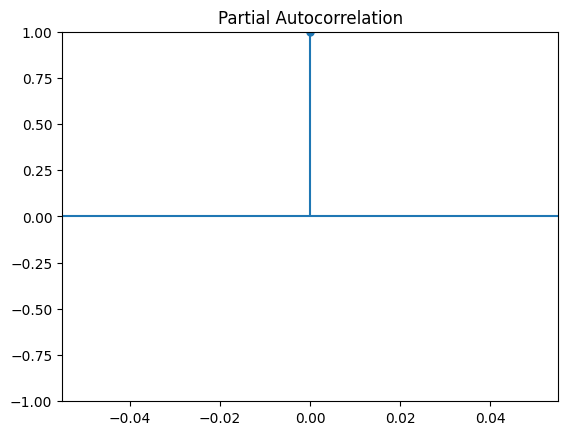

In [316]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [317]:
from statsmodels.tsa.arima.model import ARIMA

In [318]:
train=new_df.iloc[:120]['Close']

In [319]:
test=new_df.iloc[120:]

In [320]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [321]:
model_fit=model.fit()

In [322]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -387.026
Date:                Sat, 07 Dec 2024   AIC                            784.052
Time:                        11:28:55   BIC                            797.990
Sample:                             0   HQIC                           789.712
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.5284      5.552     62.059      0.000     333.648     355.409
ar.L1          0.8937      0.052     17.212      0.000       0.792       0.995
ma.L1          0.1353      0.118      1.150      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

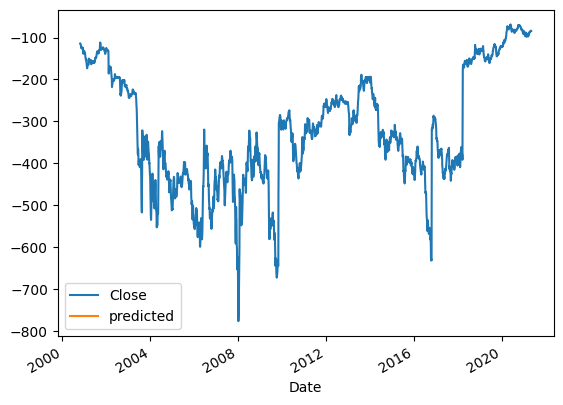

In [323]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [324]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [325]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

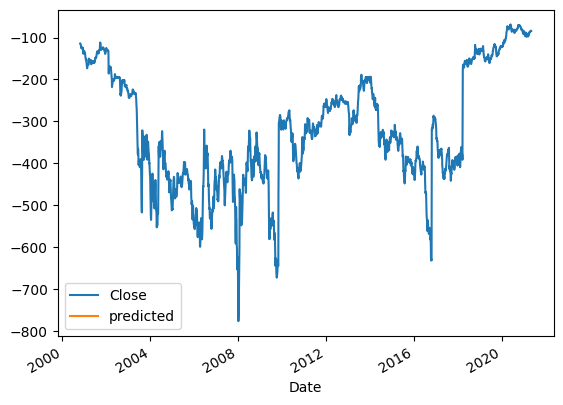

In [326]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


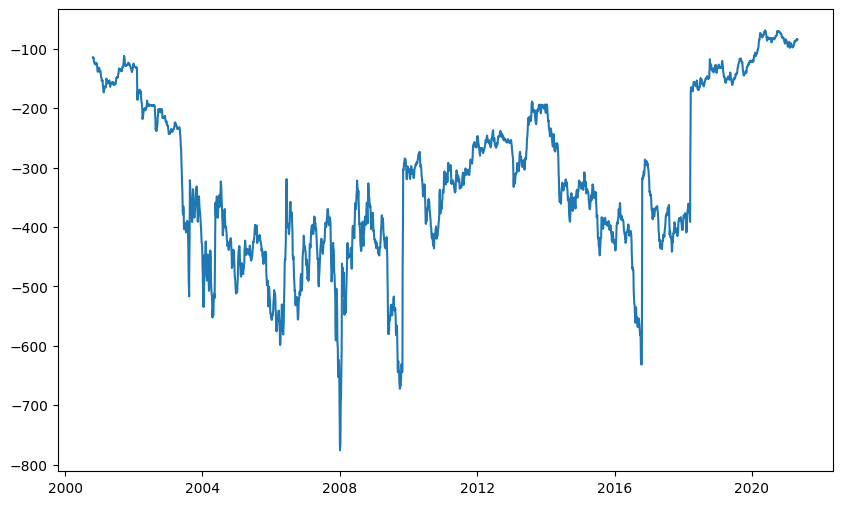

In [327]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

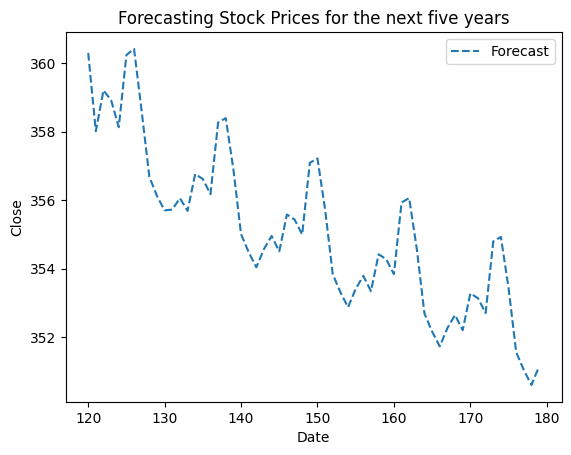

In [328]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()